In [5]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [6]:
# one hot encoding 
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

## Loading the data (Task-1)

In [7]:
# This cell updates result list for images with tumor

data = []    # storing image data in numpy array form
paths = []   # storing paths of all images
result = []   # storing one hot encoded form of target class whether normal or tumor

for r, d, f in os.walk(r"C:\Users\ssinh\Downloads\brain_tumor_dataset\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [8]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\ssinh\Downloads\brain_tumor_dataset\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [9]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [10]:
result = np.array(result)
result = result.reshape(139,2)

In [11]:
# splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Building Deep Learning Model (Task-2)

In [29]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

In [30]:
y_train.shape

(111, 2)

In [31]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 13.5746 - val_loss: 149.7161
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 14.2202 - val_loss: 58.1308
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 4.7894 - val_loss: 22.9318
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 1.1444 - val_loss: 22.3143
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 1.9232 - val_loss: 20.3506
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 1.1516 - val_loss: 15.8359
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 0.3847 - val_loss: 13.1475
Epoch 8/30
3/3 [==============================] - 3s 1s/step - loss: 0.5901 - val_loss: 12.0840
Epoch 9/30
3/3 [==============================] - 3s 1s/step - loss: 0.0305 - val_loss: 11.2187
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 0.0441 - val_loss: 9.3820
Epoch 11/30
3/3 [====================

## Plotting the performance (Task-3)

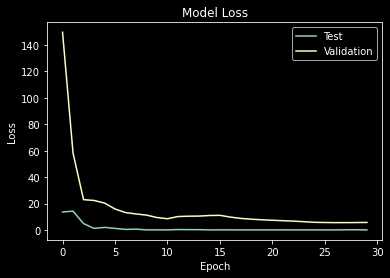

In [32]:
# fig, ax = plt.subplots(2, 1, figsize=(10,8))

#ax[0].plot(history.history['loss'], label="Train")
#ax[0].plot(history.history['val_loss'], label="Validation")
#ax[0].title.set_text('Model Loss')
# ax[0].ylabel('Loss')
# ax[0].xlabel('Epoch')
#ax[0].legend()

#ax[1].plot(history.history['accuracy'], label="Train")
#ax[1].plot(history.history['val_accuracy'], label="Validation")
#ax[1].title.set_text('Model Accuracy')
# ax[1].ylabel('Accuracy')
# ax[1].xlabel('Epoch')
#ax[1].legend()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## Manual Testing (Task-4)

In [33]:
def names(number):
    if number==0:
        return 'a Tumor'
    else:
        return 'not a tumor'

99.99799728393555% Confidence This Is not a tumor


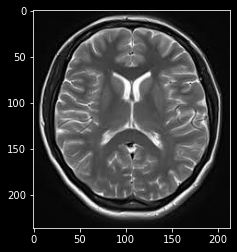

In [37]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ssinh\Downloads\brain_tumor_dataset\no\no 6.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

97.61987924575806% Confidence This Is A a Tumor


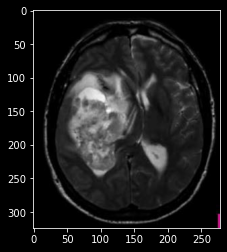

In [41]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\ssinh\Downloads\brain_tumor_dataset\yes\Y259.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

## Conclusion (Task-5)
Convolutional neural networks (CNNs) have been widely applied in healthcare, particularly in the fields of image analysis and natural language processing.

In image analysis, CNNs have been used for tasks such as medical image segmentation, which involves separating different structures or objects within an image, and medical image classification, which involves identifying the type or severity of a condition depicted in an image. For example, CNNs have been used to identify brain tumors in MRI scans, classify skin lesions as benign or malignant, and segment organs in CT scans.

In natural language processing, CNNs have been used to analyze electronic medical records (EMRs) and extract important information for tasks such as patient diagnosis and treatment planning. For example, CNNs have been used to identify medical conditions mentioned in EMRs, extract medication and allergy information, and predict patient outcomes.

Overall, CNNs have proven to be useful tools for improving the accuracy and efficiency of healthcare tasks, and have the potential to significantly impact patient care.